# Business understanding

BO1 : Understand data behavior.

=> DSO1 : Carry out a descriptive analysis on the data.

BO2 : Improve the efficiency of the coupon application processing process. 

=> DSO2 : Carry out a classification for the different coupon requests.

BO3 : Increase Conversion Rate: By offering relevant coupons to customers, the business can increase the conversion rate of coupons, which can lead to increased sales.

=> DSO1 : Influencer Analysis: Analyze data to understand which factors most influence a customer's decision to accept or decline a coupon.

# Data understanding

<div style='font-size:100%;'>
    <a id='import'></a>
    <h3 style='color:White; font-weight: bold; font-family: montserrat;'>
        📚 Importing necessary libraries  
    </h3>
 
</div>

In [1]:
import pandas as pd
import numpy as np
# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<div style='font-size:100%;'>
    <a id='import'></a>
    <h3 style='color:White; font-weight: bold; font-family: montserrat;'>
        📚 Data Visualisation  
    </h3>
 
</div>

In [93]:
data = pd.read_csv('CouponRecommendation.csv')

In [94]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [95]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### For "temperature" variable we note :
 Average: 63.301798	
 
 First quartile is from 30 to 55
 
 Second quartile is from 55 to 80
 
 Third quartile and fourth quartile are equal 80

### For "has_children" variable we note:
 Average: 0.414144	
 
 First quartile and second quartile are equal 0
 
 Third quartile and fourth quartile are equal 1

### For "toCoupon_GEQ5min" variable we note:
 Average: 1
 
 First quartile, second quartile, third quartile and fourth quartile are equal 1
 
 => So this feature is not significant and that is why we will drop it

### For "Y" variable we note:
 Average: 0.568433
 
 First quartile is equal 0
 
 Second quartile is from 0 to 1
 
 Third quartile and fourth quartile are equal 1

In [96]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

=> In this data frame there are two types of features "Int" and "Object"

In [97]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Columns (car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50) have missing values

Column "car" has a relatively large number of missing values. 

In this case, the "car" column only has 108 non-null entries out of 12,684. So, we can consider this variable as insignificant and we will drop it.


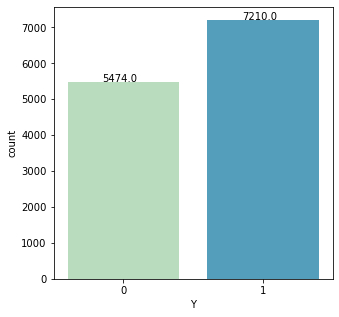

In [98]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Y'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

According to this countplot, we note that our target, "Y", has 5474 zeros and 7210 ones

=> So this feature is imblanced

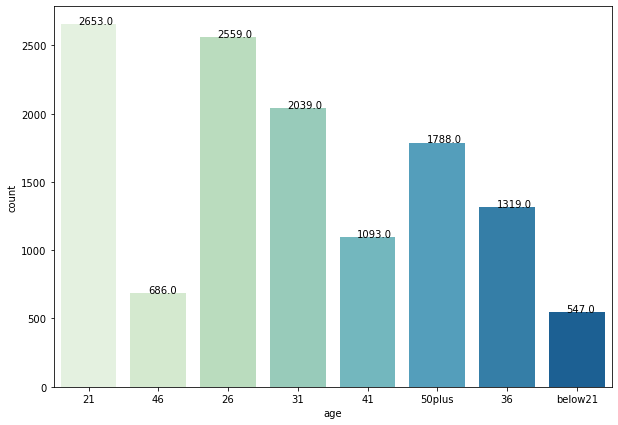

In [99]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x = data['age'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

To visualize the number of occurrences of each value for the variable "Age"

We can see that the age of 21 has the highest occurrence and the ages of 46, below21, and 41 have too few occurrences compared to the age of 21.

- The most common Age among the coupon is 21.

- The least common Age is below21

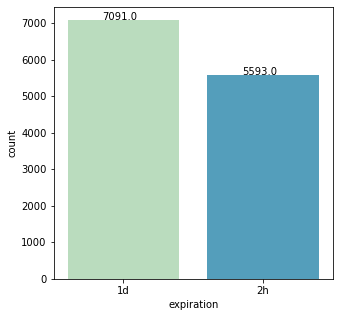

In [100]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['expiration'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

According to this countplot, we note that the feature "Expiration", has 7091 of "1d" and 5593 of "2h"

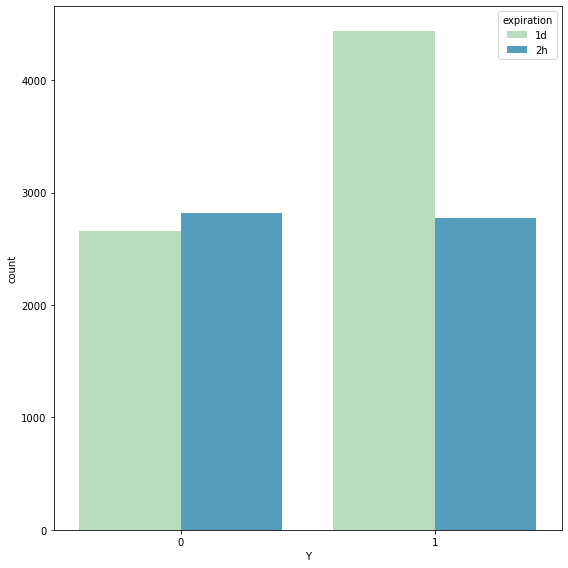

In [101]:
fig = plt.figure( figsize=(8, 8))  
ax = sns.countplot(data=data, x = 'Y',  palette="GnBu", hue='expiration')
fig.tight_layout()  
plt.show()

- we note that the coupon that exipres after "1d" is the most accepted

- we note that the coupon that exipres after "2h" has the same chance to be accepted or rejected

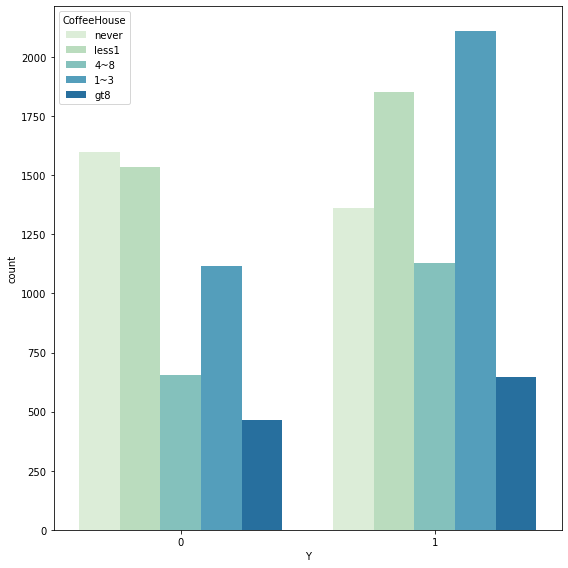

In [102]:
fig = plt.figure( figsize=(8, 8))  
ax = sns.countplot(data=data, x = 'Y',  palette="GnBu", hue='CoffeeHouse')
fig.tight_layout()  
plt.show()

- we notice that the driver who went to CoffeHouse ones to three times per month, his coupon is more likely to be accepted

- we notice that the driver who never went to CoffeHouse, his coupon is more likely to be rejected

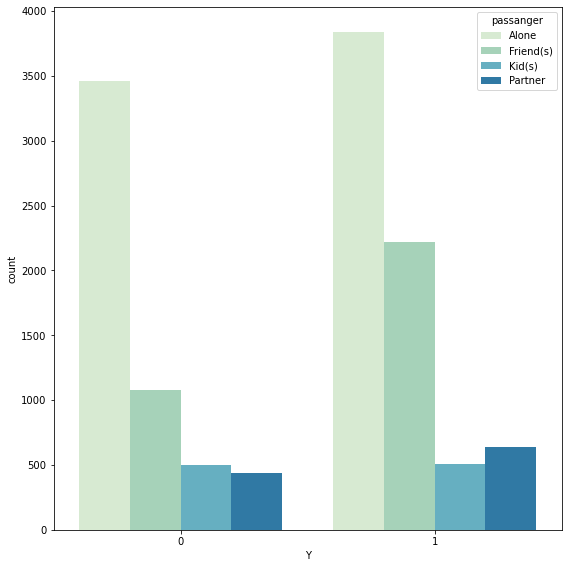

In [103]:
fig = plt.figure( figsize=(8, 8))  
ax = sns.countplot(data=data, x = 'Y',  palette="GnBu", hue='passanger')
fig.tight_layout()  
plt.show()

- we notice that the driver who had friends as passengers, his coupon is more likely to be accepted


# Data preperation 

In [104]:
data_d=data.copy()
data_d.drop(['car'],inplace = True,axis=1)
data_d.drop(['toCoupon_GEQ5min'],inplace = True,axis=1)
data_d.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

Droping columns car and toCoupon_GEQ5min

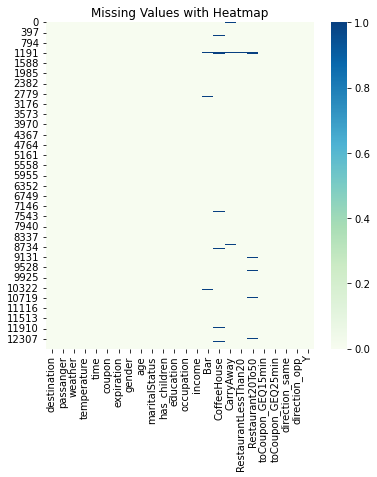

In [105]:
plt.figure(figsize=(6, 6))
sns.heatmap(data=data_d.isnull(),cbar=True, cmap="GnBu")
plt.title('Missing Values with Heatmap')
plt.show()

Columns with missing values have unique variation in occurrence per column, and also when compared to the rest of columns.

White cells indicate that there are no missing values for the corresponding variable in the observation.

Dark blue cells indicate that there is a significant number of missing values for the corresponding variable in the observation.

In [106]:
cat_features = data_d.select_dtypes(include=['object','bool']).columns.tolist()
cat_features

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

Selecting categorical features

In [107]:
nominal_features = data_d.select_dtypes(include=['int','float']).columns.tolist()
nominal_features

['temperature',
 'has_children',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

Selecting numerical features

In [108]:
for feature in cat_features:
    print(feature, data[feature].nunique())

destination 3
passanger 4
weather 3
time 5
coupon 5
expiration 2
gender 2
age 8
maritalStatus 5
education 6
occupation 25
income 9
Bar 5
CoffeeHouse 5
CarryAway 5
RestaurantLessThan20 5
Restaurant20To50 5


To get the number of repeated values for each variable

In [110]:
data['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [111]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_fillna = pd.DataFrame(imputer.fit_transform(data_d), columns=data_d.columns, index=data_d.index)


It replaces missing values in each column with the most frequent value from that column.

In [112]:
data_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  object
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [113]:
data_fillna.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

All the missing values are replaced by the most frequent values

In [114]:
data_fillna['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

we note that the feature "direction_same", has much more zeros than ones

In [115]:
# converting numeric features stored in "nominal_features" from "Object" type to "Int" type
for feature in nominal_features:
    data_fillna[feature] = data_fillna[feature].astype('int')


In [116]:
cat_features2 = data_fillna.select_dtypes(include=['object','bool']).columns.tolist()
cat_features2

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [117]:
data_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int32 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int32 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: White; font-weight: bold; font-family: Cascadia code;'>
       Data transformation
    </h2>
</div>

In [118]:
feature_label_encoder = ['weather','age','coupon','expiration','gender','time','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
feature_Ohe= ['maritalStatus','destination','passenger']

we have chosen features of LabelEncoder and OneHotEncoding based on Ordinal and Nominal features

In [119]:
data_transformation = data_fillna.copy()

In [120]:
##destination_dictionary={'Snowy':0,'Rainy':1,'Sunny':2}
##data_transformation.replace(destination_dictionary,inplace=True)

<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: White; font-weight: bold; font-family: Cascadia code;'>
       LabelEncoder
    </h2>
</div>

Label encoding is a very simple approch and it involves converting the labels into a numeric form

In [121]:
from sklearn import preprocessing
for feature in feature_label_encoder:
    le = preprocessing.LabelEncoder()
    data_transformation[feature] = le.fit_transform(data_transformation[feature])


In [122]:
data_transformation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  int32 
 3   temperature           12684 non-null  int32 
 4   time                  12684 non-null  int32 
 5   coupon                12684 non-null  int32 
 6   expiration            12684 non-null  int32 
 7   gender                12684 non-null  int32 
 8   age                   12684 non-null  int32 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int32 
 11  education             12684 non-null  int32 
 12  occupation            12684 non-null  int32 
 13  income                12684 non-null  int32 
 14  Bar                   12684 non-null  int32 
 15  CoffeeHouse           12684 non-null

<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: White; font-weight: bold; font-family: Cascadia code;'>
       One-hot encoding 
    </h2>
</div>

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [123]:
data_transformation2=data_transformation.copy()


In [124]:
data_transformation2 = pd.get_dummies(data_transformation2, columns=['maritalStatus'])

In [125]:
data_transformation2 = pd.get_dummies(data_transformation2, columns=['destination'])

In [126]:
data_transformation2 = pd.get_dummies(data_transformation2, columns=['passanger'])

In [127]:
data_transformation2.columns

Index(['weather', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner'],
      dtype='object')

In [128]:
data_transformation2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   weather                          12684 non-null  int32
 1   temperature                      12684 non-null  int32
 2   time                             12684 non-null  int32
 3   coupon                           12684 non-null  int32
 4   expiration                       12684 non-null  int32
 5   gender                           12684 non-null  int32
 6   age                              12684 non-null  int32
 7   has_children                     12684 non-null  int32
 8   education                        12684 non-null  int32
 9   occupation                       12684 non-null  int32
 10  income                           12684 non-null  int32
 11  Bar                              12684 non-null  int32
 12  CoffeeHouse                      12684 non-nul

In [129]:
data_transformation2.describe(include='all')

,weather,temperature,time,coupon,expiration,gender,age,has_children,education,occupation,...,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,...,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,1.698439,63.301798,2.236676,2.050221,0.440949,0.486676,2.597997,0.414144,2.590744,14.309208,...,0.374645,0.172343,0.010249,0.255203,0.495348,0.249448,0.575922,0.260013,0.079313,0.084752
std,0.633597,19.154486,1.439508,1.348546,0.496520,0.499842,2.224901,0.492593,1.882300,7.992078,...,0.484050,0.377693,0.100722,0.435993,0.499998,0.432711,0.494222,0.438658,0.270237,0.278524
min,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,80.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,80.000000,3.000000,3.000000,1.000000,1.000000,4.000000,1.000000,5.000000,22.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2.000000,80.000000,4.000000,4.000000,1.000000,1.000000,7.000000,1.000000,5.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As long as we have in our dataset very large numbers and very small ones our model will focus on the huge numbers and will ignore the small ones. That's why we should use normalization which rescales the values into a range of [0,1] or Standardization which rescales data to have a mean of 0 and standard deviation of 1.

<img src="normalization.png" align='center' style="width:60%;height:82%">

In [130]:
cat_features3 = data_transformation2.select_dtypes(include=['object','bool']).columns.tolist()
cat_features3

[]

<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: White; font-weight: bold; font-family: Cascadia code;'>
       Pairplot 
    </h2>
</div>

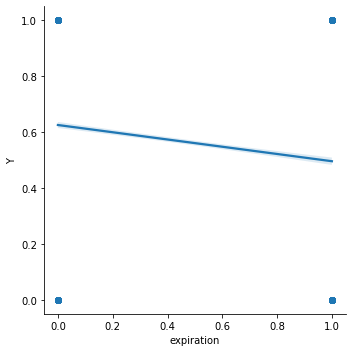

In [131]:
sns.lmplot(data=data_transformation2, x = 'expiration', y = 'Y')

We have a decreasing line, the slope is negative, so the relationship between "Y" and "Expiration" is also negative.

<div style='font-size:100%;'>
    <a id='outliers'></a>
    <h3 style='color: White; font-weight: bold; font-family: Cascadia code;'>
         ❌ Dealing with outliers 
    </h3>
</div>

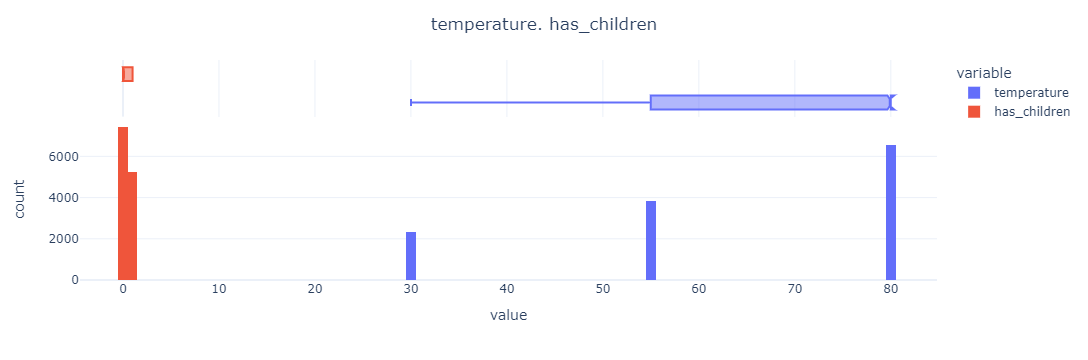

In [132]:
fig = px.histogram(data_frame =data_transformation2, 
                   x=["temperature","has_children"],
                   width=1000,
                   marginal="box",
                   nbins= 100,
                   template="plotly_white"
                )

fig.update_layout(title = "temperature. has_children" , title_x = 0.5)
fig.show()

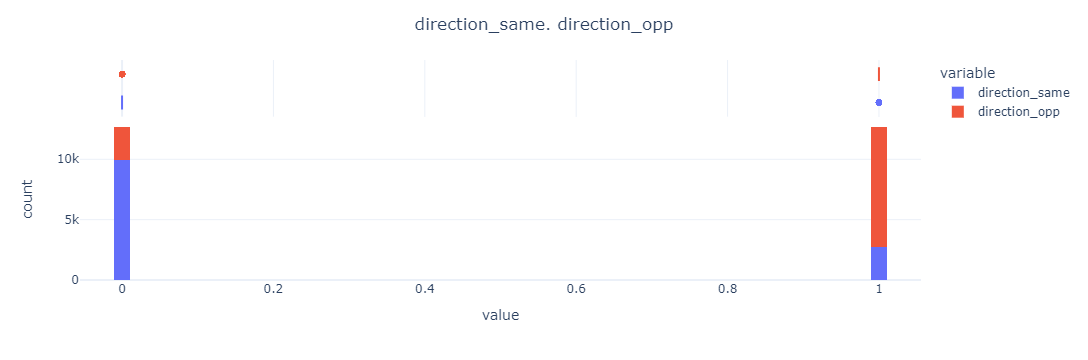

In [133]:
fig = px.histogram(data_frame =data_transformation2, 
                   x=["direction_same","direction_opp"],
                   width=1000,
                   marginal="box",
                   nbins= 100,
                   template="plotly_white"
                )

fig.update_layout(title = "direction_same. direction_opp" , title_x = 0.5)
fig.show()

In [134]:
x1=data_transformation2.iloc[:, :20]
print(x1.shape)

y1=data_transformation2.iloc[:,20:]
print(y1.shape)

(12684, 20)
(12684, 13)


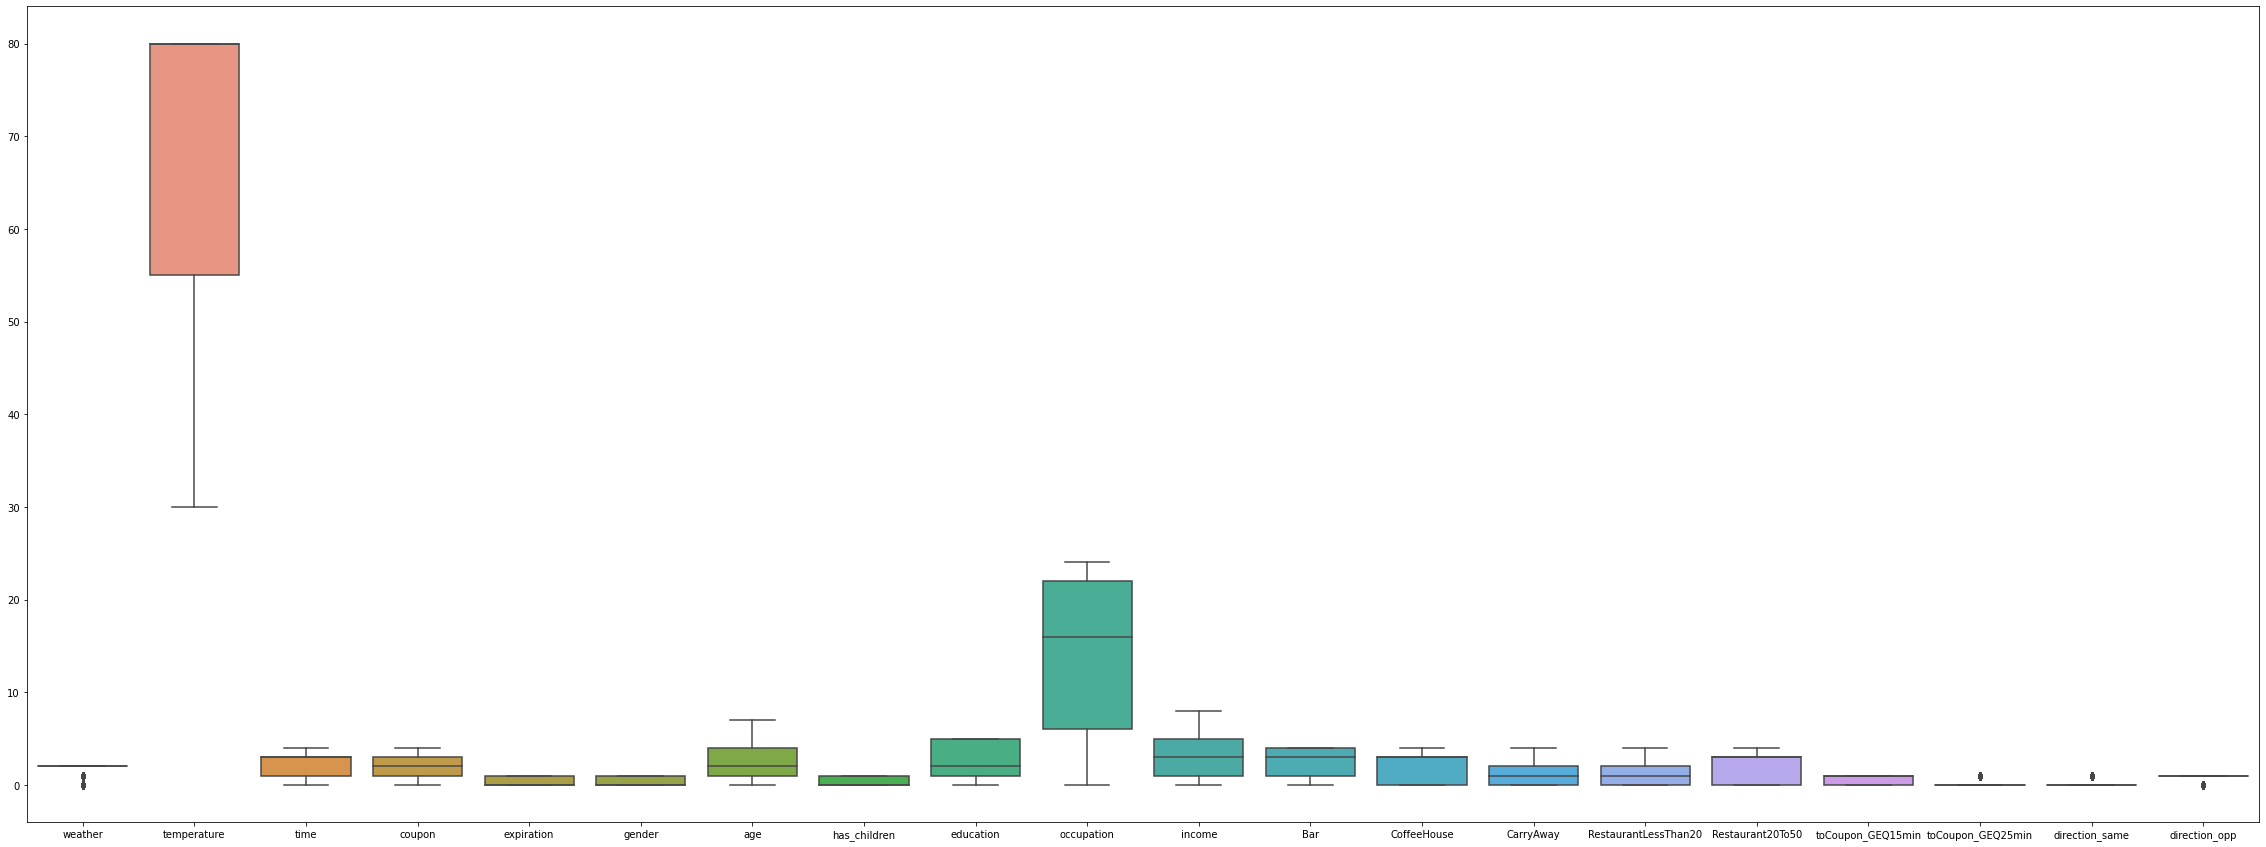

In [135]:
plt.figure(figsize=(40,15))
sns.boxplot(data = x1)
plt.show()

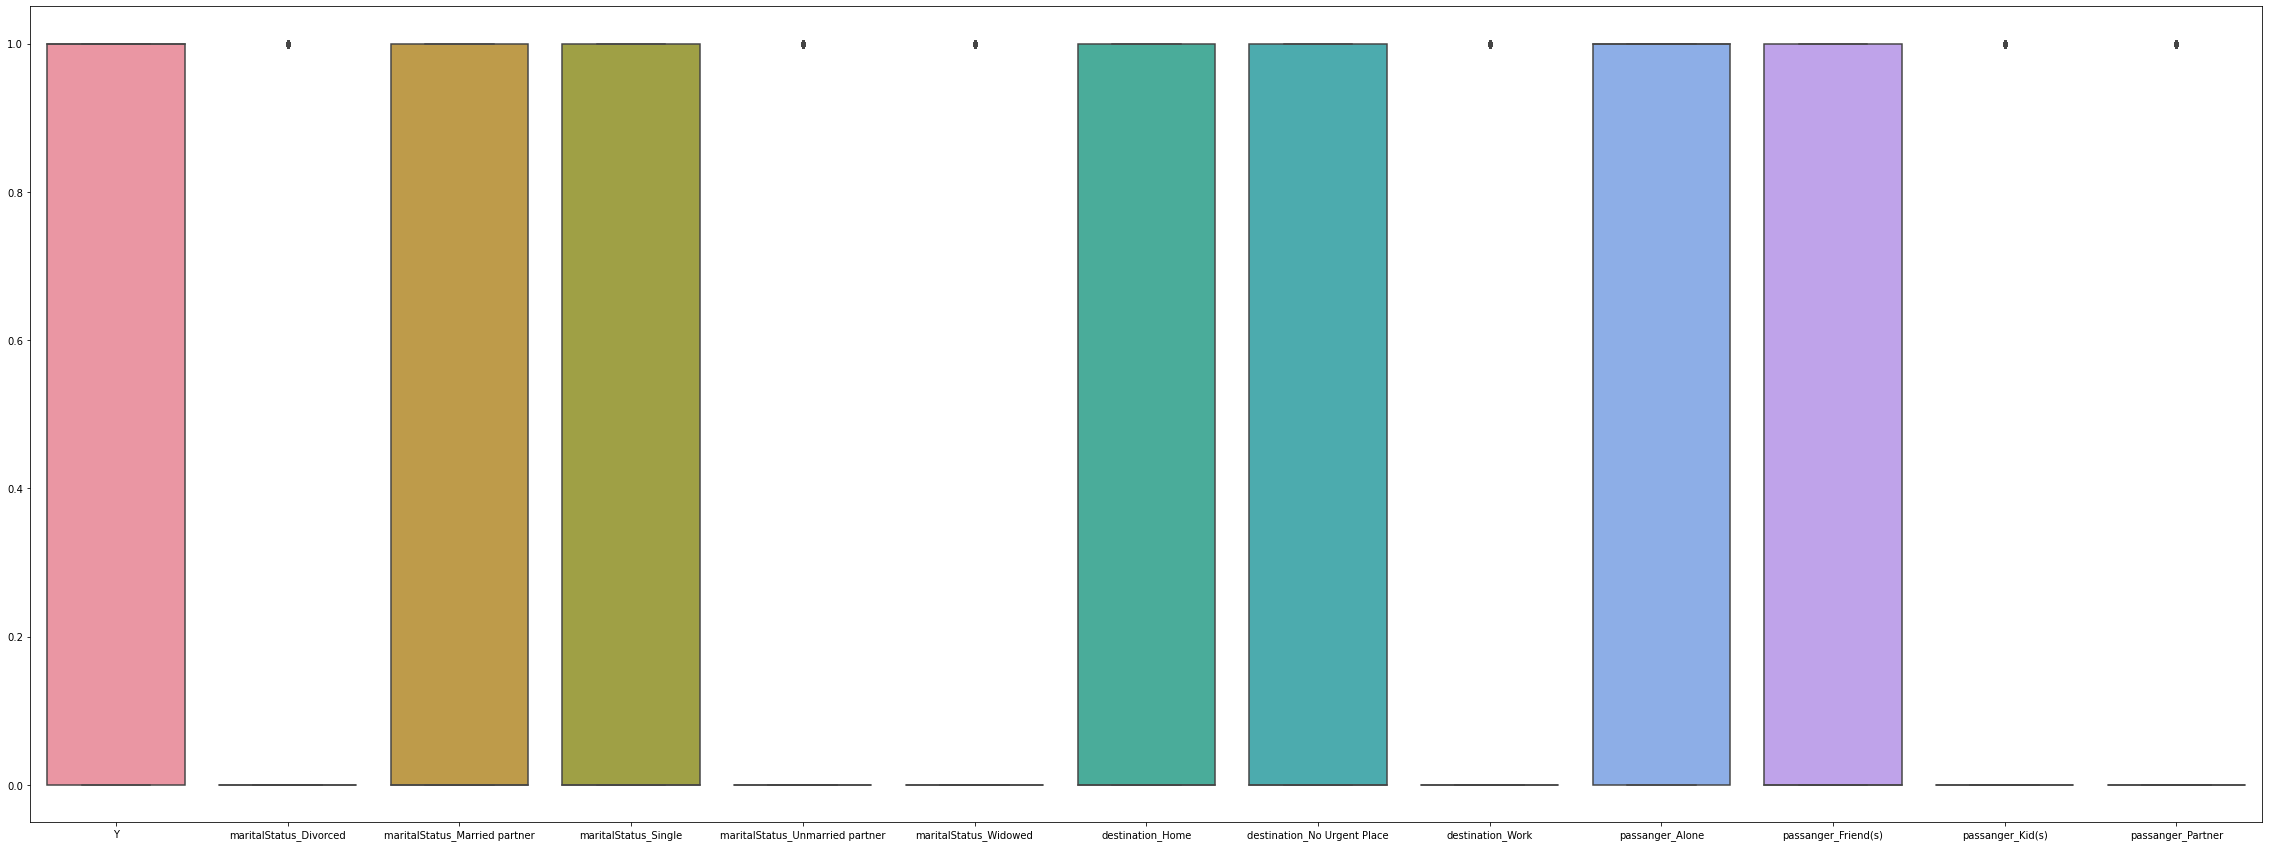

In [136]:
plt.figure(figsize=(40,15))
sns.boxplot(data = y1)
plt.show()

We have divided the data into two, so we will have two boxplots to better visualize and then interpret with more precision.

We see from the two boxplots that we have outliers, but in reality we don't have outliers because there is an imbalance in the data. 

<div style='font-size:100%;'>
    <a id='cm'></a>
    <h3 style='color: White; font-weight: bold; font-family: Cascadia code;'>
        📈 Correlation Map 
    </h3>
</div>

In [137]:
# correlation map
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 34 , 34 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    plt.title('Correlation coefficient between different features',fontsize = 16)
    
    s = sns.heatmap(
        corr, 
        cmap=cmap,
        square=True, 
        cbar_kws={ 'shrink' : .8 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }

        )   

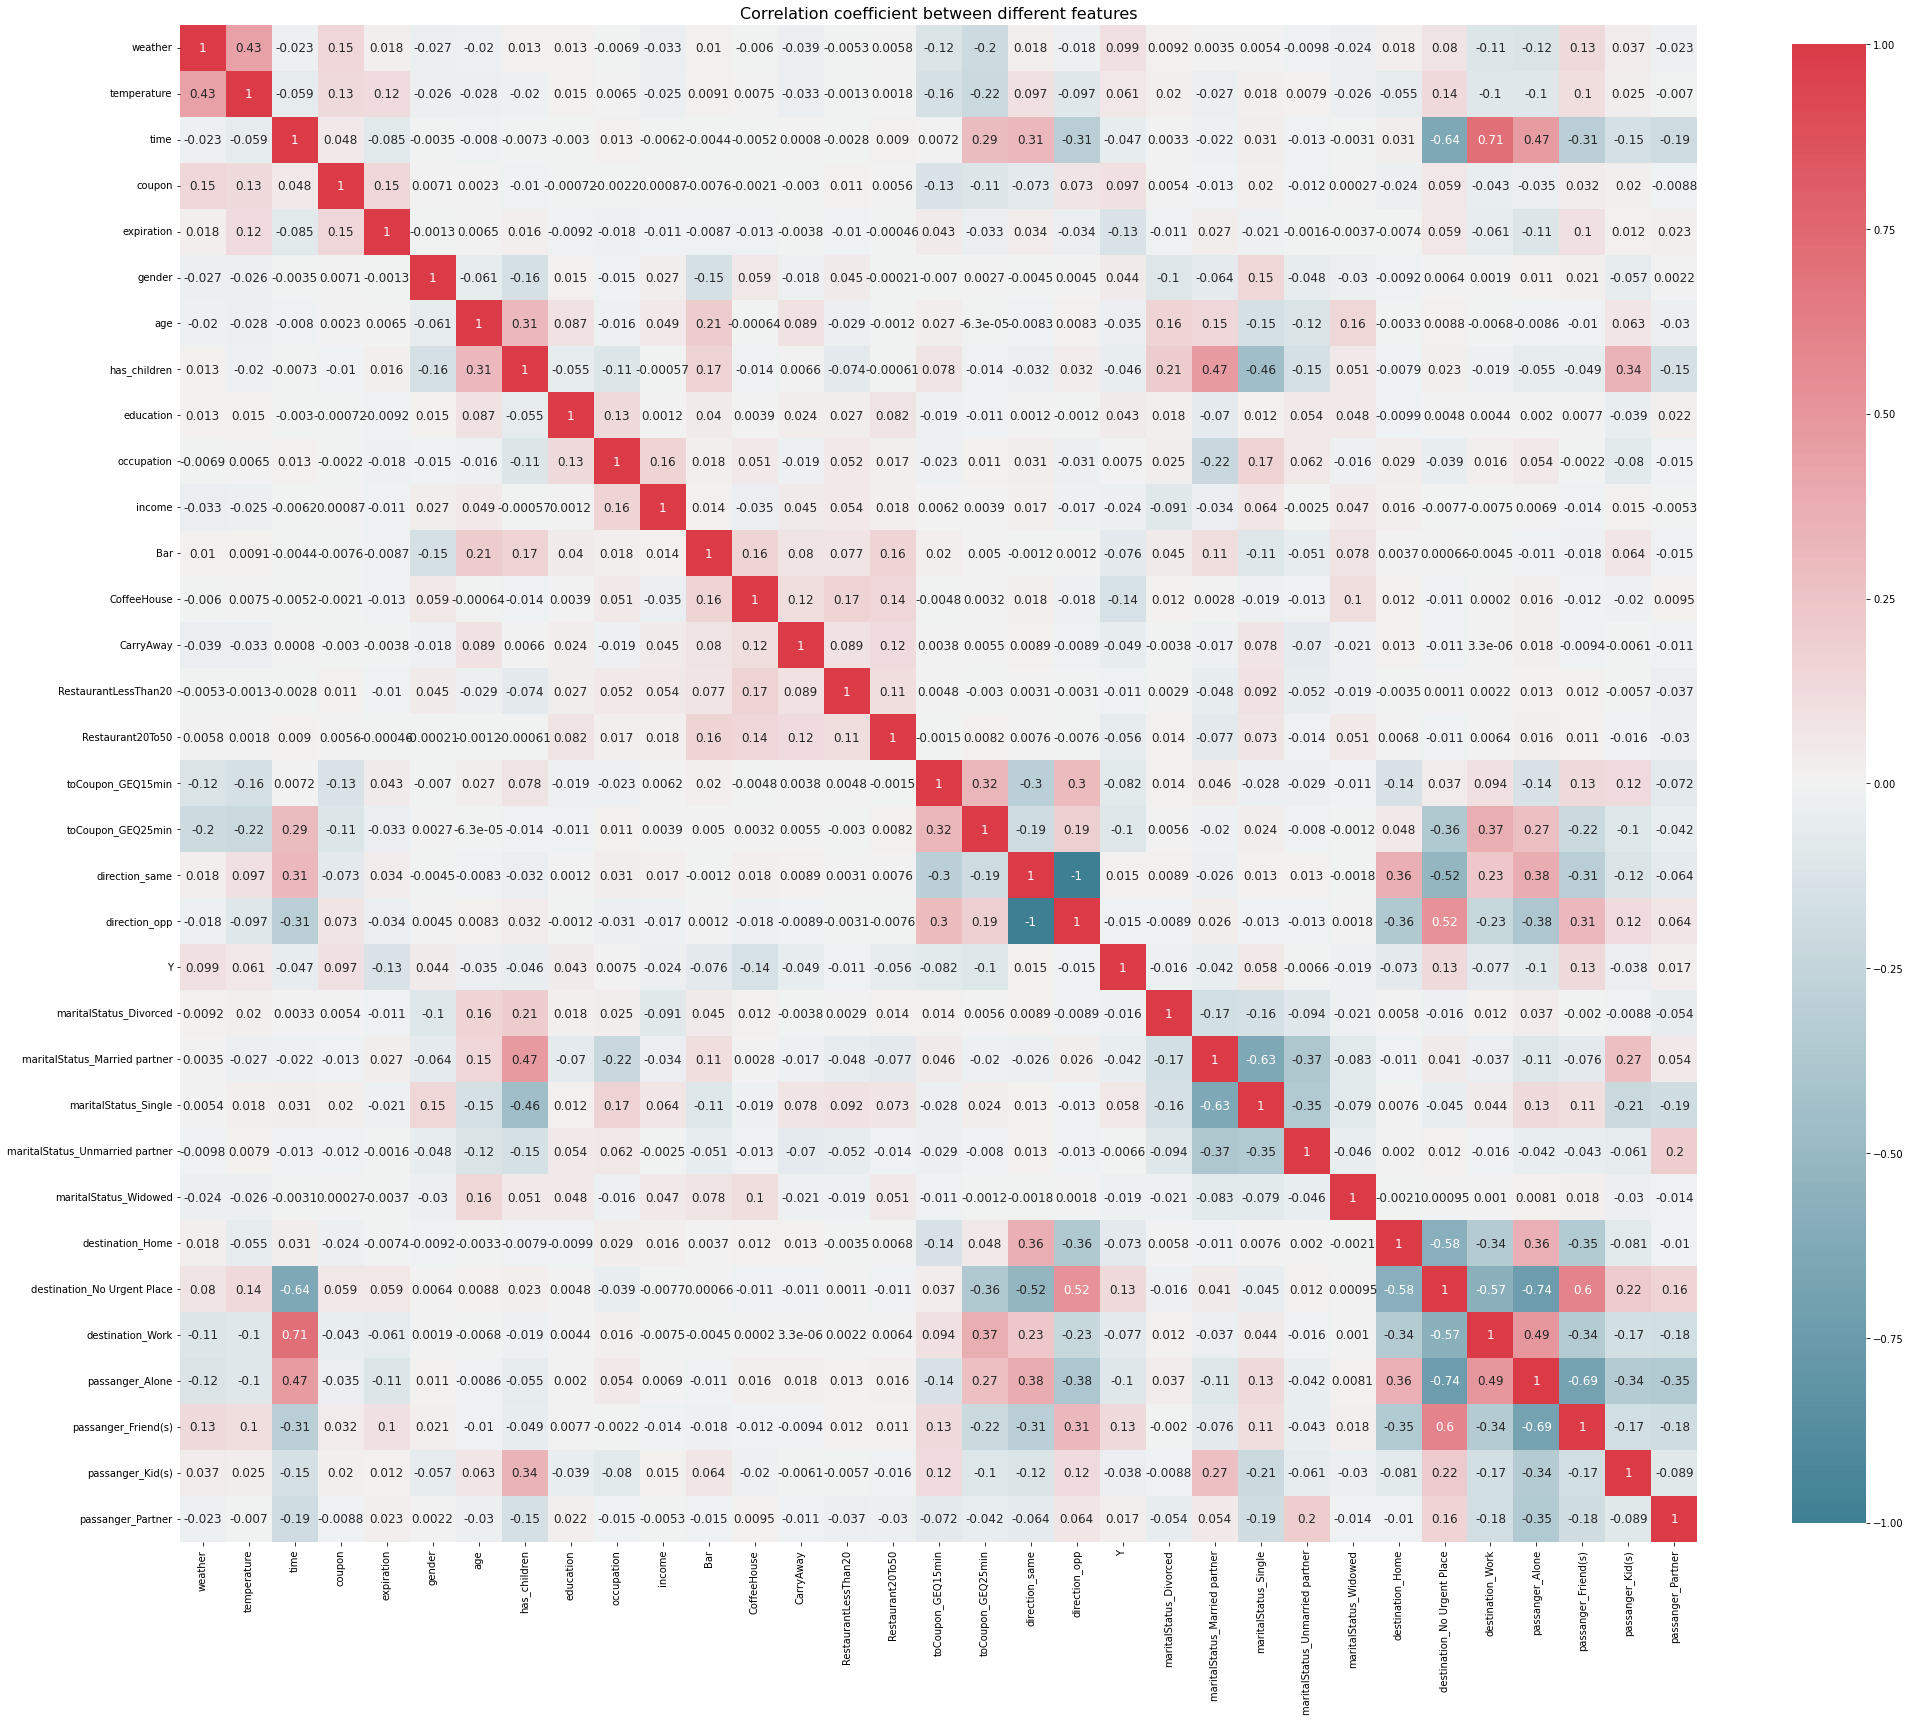

In [57]:
plot_correlation_map(data_transformation2)

In [138]:
Selected_features = ['expiration','weather','coupon','CoffeeHouse','toCoupon_GEQ15min','toCoupon_GEQ25min','destination_No Urgent Place', 'passanger_Alone','passanger_Friend(s)']
Selected_features

['expiration',
 'weather',
 'coupon',
 'CoffeeHouse',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'destination_No Urgent Place',
 'passanger_Alone',
 'passanger_Friend(s)']

- Based on the graphical representation above, we identified the variables correlated with the target variable "Y" that we selected and grouped in "selected_feature". To achieve this selection, we relied on the correlation matrix .

<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: White; font-weight: bold; font-family: Cascadia code;'>
       Normalization 
    </h2>
</div>

In [139]:
data_MinMaxScaler = data_transformation2.copy()

In [140]:
data_MinMaxScaler.drop(['Y'],inplace = True,axis=1)

In [141]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))# normaliser les données pour qu'elles font parties de l'intervalle [0,1]
data_MinMaxScaler=scaler.fit_transform(data_MinMaxScaler)
data_MinMaxScaler=pd.DataFrame(data_MinMaxScaler)
# pour la normalisation du Dataframe 


In [142]:
data_MinMaxScaler.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,...,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.849219,0.666036,0.559169,0.512555,0.440949,0.486676,0.371142,0.414144,0.518149,0.596217,...,0.374645,0.172343,0.010249,0.255203,0.495348,0.249448,0.575922,0.260013,0.079313,0.084752
std,0.316799,0.383090,0.359877,0.337137,0.496520,0.499842,0.317843,0.492593,0.376460,0.333003,...,0.484050,0.377693,0.100722,0.435993,0.499998,0.432711,0.494222,0.438658,0.270237,0.278524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.500000,0.250000,0.250000,0.000000,0.000000,0.142857,0.000000,0.200000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.750000,0.500000,0.000000,0.000000,0.285714,0.000000,0.400000,0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.750000,0.750000,1.000000,1.000000,0.571429,1.000000,1.000000,0.916667,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 'normalize' rescales the data within each row, not column, of the dataset.
- 'MinMaxScaler' scales the data within each column of the dataset, so it's column-wise scaling.

          X_transformed= X-Xmin / Xmax-Xmin

<div style='font-size:100%;'>
    <a id='HE'></a>
    <h2 style='color: White; font-weight: bold; font-family: Cascadia code;'>
       PCA 
    </h2>
</div>

In [143]:
from sklearn.decomposition import PCA

pca = PCA(0.99) #Use components such that 99% of variance is retained
data_pca = pca.fit_transform(data_MinMaxScaler)


In [144]:
data_pca.shape

(12684, 26)

- PCA created 26 principal components out of 32 original columns

In [145]:
pca.explained_variance_ratio_

array([0.17392729, 0.11048723, 0.08101244, 0.05403284, 0.05304484,
       0.05062335, 0.04827439, 0.04109159, 0.03853936, 0.03296613,
       0.03197609, 0.02920799, 0.02536924, 0.02503049, 0.02425902,
       0.02265419, 0.02093085, 0.01856575, 0.01794457, 0.01661999,
       0.01541889, 0.01377279, 0.01340621, 0.01231239, 0.01029168,
       0.00891071])

In [146]:
print(sum(pca.explained_variance_ratio_[:data_pca.shape[1]]))

0.9906702986650978


In [147]:
Y = data_transformation2.Y
Y # Extract the target 

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int32

In [148]:
print(data_transformation2.columns)

Index(['weather', 'temperature', 'time', 'coupon', 'expiration', 'gender',
       'age', 'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'maritalStatus_Divorced',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)',
       'passanger_Partner'],
      dtype='object')


In [149]:
new_column_names = [
    'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender',
    'age', 'has_children', 'education', 'occupation', 'income', 'Bar',
    'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
    'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
    'direction_same', 'direction_opp', 'maritalStatus_Divorced',
    'maritalStatus_Married partner', 'maritalStatus_Single',
    'maritalStatus_Unmarried partner', 'maritalStatus_Widowed',
    'destination_Home', 'destination_No Urgent Place', 'destination_Work',
    'passanger_Alone', 'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner'
]

# Rename the columns
data_MinMaxScaler.columns = new_column_names



- We need to add the names of the columns that are removed by the normalization.

In [150]:
data_MinMaxScaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   weather                          12684 non-null  float64
 1   temperature                      12684 non-null  float64
 2   time                             12684 non-null  float64
 3   coupon                           12684 non-null  float64
 4   expiration                       12684 non-null  float64
 5   gender                           12684 non-null  float64
 6   age                              12684 non-null  float64
 7   has_children                     12684 non-null  float64
 8   education                        12684 non-null  float64
 9   occupation                       12684 non-null  float64
 10  income                           12684 non-null  float64
 11  Bar                              12684 non-null  float64
 12  CoffeeHouse       

In [151]:
features = data_MinMaxScaler.select_dtypes(exclude=['int']).columns.tolist()
features

['weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'maritalStatus_Divorced',
 'maritalStatus_Married partner',
 'maritalStatus_Single',
 'maritalStatus_Unmarried partner',
 'maritalStatus_Widowed',
 'destination_Home',
 'destination_No Urgent Place',
 'destination_Work',
 'passanger_Alone',
 'passanger_Friend(s)',
 'passanger_Kid(s)',
 'passanger_Partner']

In [152]:
Selected_features = data_MinMaxScaler[['expiration','weather','coupon','CoffeeHouse','toCoupon_GEQ15min','toCoupon_GEQ25min','destination_No Urgent Place', 'passanger_Alone','passanger_Friend(s)']]
Selected_features

,expiration,weather,coupon,CoffeeHouse,toCoupon_GEQ15min,toCoupon_GEQ25min,destination_No Urgent Place,passanger_Alone,passanger_Friend(s)
0,0.0,1.0,1.00,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.50,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,1.0,0.25,1.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.50,1.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.50,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
12679,0.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0
12680,0.0,0.0,0.25,1.0,0.0,0.0,0.0,1.0,0.0
12681,0.0,0.5,0.50,1.0,0.0,0.0,0.0,1.0,0.0
12682,0.0,0.5,0.00,1.0,1.0,1.0,0.0,1.0,0.0


In [72]:
Selected_features2=Selected_features.copy()
Selected_features2['y']=Y

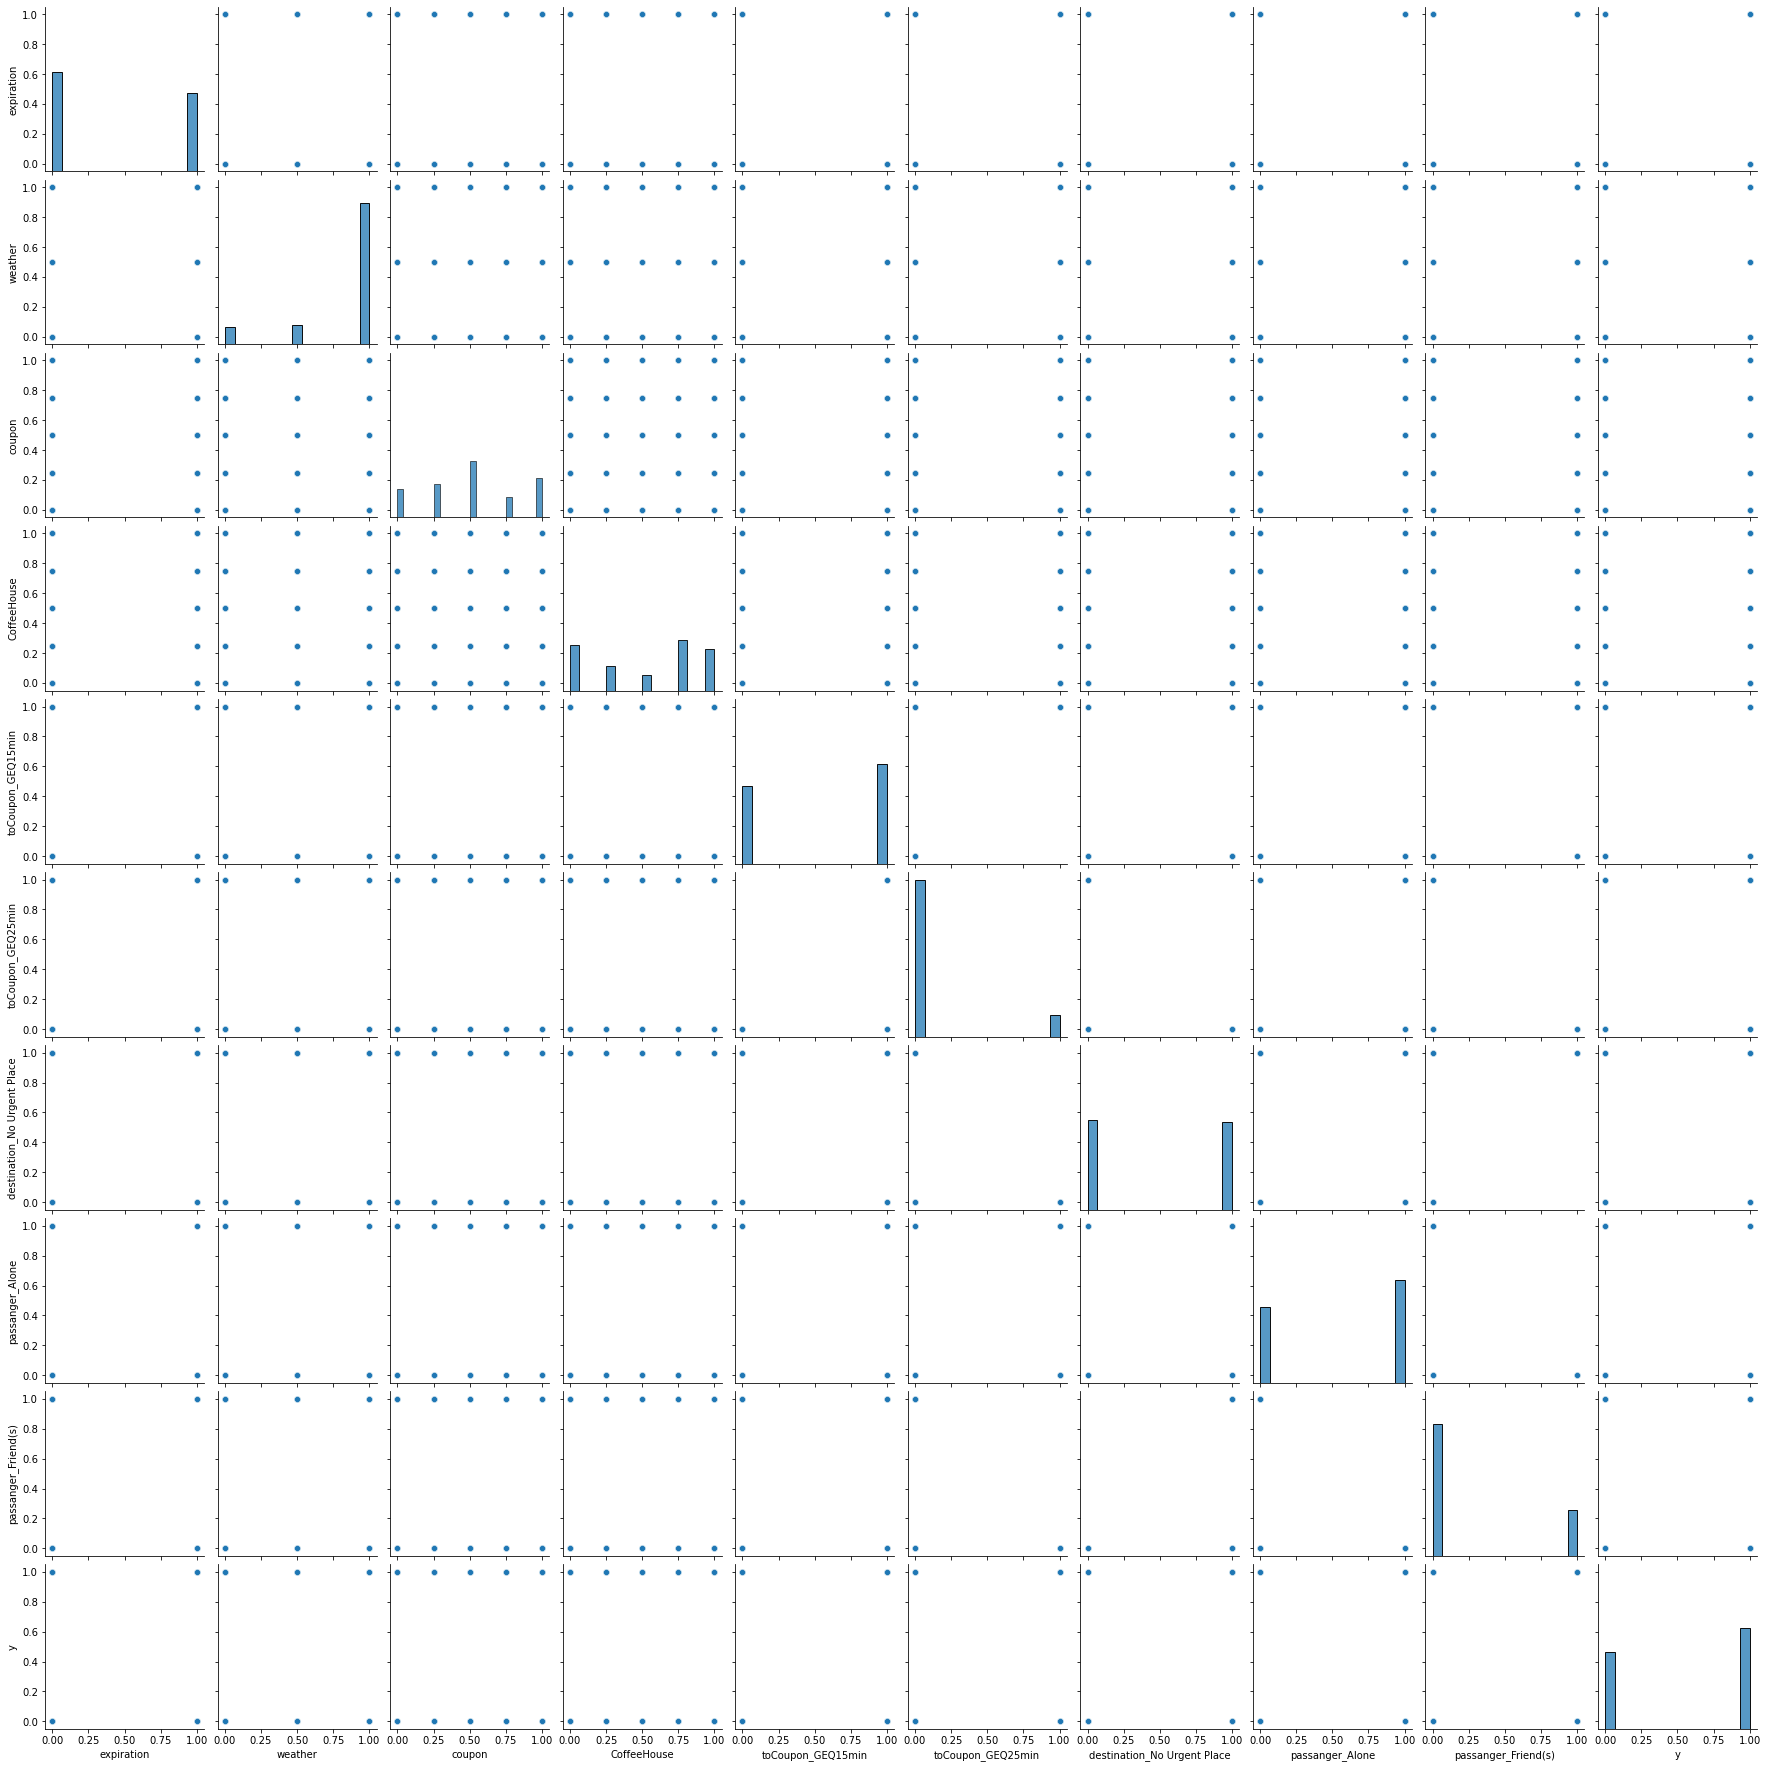

In [73]:
sns.pairplot(Selected_features2)

# Modeling

In [74]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
#pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [154]:
smote = SMOTE(sampling_strategy='auto')  

X_train_resampled, y_train_resampled = smote.fit_resample(Selected_features, Y)
X_train, X_test, y_train, y_test = train_test_split( X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

- Our data is not balanced so we used SMOTE method to balance it by creating synthetic instances of the minority class.

In [155]:
y_test.value_counts()

1    1474
0    1410
Name: Y, dtype: int64

In [156]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( data_MinMaxScaler, Y, test_size=0.2, random_state=42)

<h3 style='font-family: montserrat;'>🧐Understanding things :</h3>

<h4>Precision</h4>
<br>Precision is a measure of the accuracy provided that a class label has been predicted. 
<br>It is defined by:
<center style='color: red'><b><i> precision = TP / (TP + FP)</i></b></center>

<h4>Recall</h4>
<br>Recall is true positive rate. 
<br>It is defined by:
<center style='color: red'><b><i> recall = TP / (TP + FN)</i></b></center>

<h4>F1-Score</h4>
<br> The F1 score is a metric that combines precision and recall into a single value, providing a balanced measure of a model's performance in terms of both positive predictions and the correct identification of actual positives. 
<br>A higher F1 score indicates a model that is effective at both minimizing false positives and false negatives.
<br>It is defined by:
<center style='color: red'><b><i> f1-score = 2 * (precision * recall) / (precision + recall)</i></b></center>

In [157]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, log_loss

In [158]:
def result(X, y, ts, rs, model):
    #applying smote to balance the target
    smote = SMOTE(sampling_strategy='auto')
    X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


    X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=ts, random_state=rs)    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()

    # print("Log loss: ")
    # print("-" * 100)
    # yhat_prob = model.predict_proba(X_test)
    # print(log_loss(y_test, yhat_prob))

    # print("Confusion Matrix: ")
    # plt.figure(figsize=(10, 5))
    # sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
    # plt.title('Confusion Matrix', fontsize=20)
    # print()




In [159]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

arrayname=["LogisticRegression","DecisionTree","RandomForest","XGBoost","KNeighbors"]
arraydata=["data_MinMaxScaler","data_pca","Selected_features"]
LR = LogisticRegression(penalty='none').fit(X_train,y_train)
Dt = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(max_depth=2, random_state=0)
bst = XGBClassifier(n_estimators=6, max_depth=6, learning_rate=1, objective='binary:logistic')
neigh = KNeighborsClassifier(n_neighbors=9) 
j=0
for data in [data_MinMaxScaler,data_pca,Selected_features]:
    i=0
    for Mo in[LR,Dt,clf,bst,neigh]:
        print(arrayname[i],":",arraydata[j])
        result(data, Y, 0.2, 42, Mo)
        i+=1
    j+=1

LogisticRegression : data_MinMaxScaler
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.65      0.64      1410
           1       0.65      0.63      0.64      1474

    accuracy                           0.64      2884
   macro avg       0.64      0.64      0.64      2884
weighted avg       0.64      0.64      0.64      2884

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6369625520110958
----------------------------------------------------------------------------------------------------

DecisionTree : data_MinMaxScaler
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      1410
           1       0.73      0.72      0.72      1474

    accuracy                           0.72      2884
   macro avg       0.72      0.72      0.72      2884
weighted avg       0.72      0.72      

Selected models:
- data_MinMaxScaler: XGBoost
- Data_PCA: KNN
- Selected_features: DecisionTree 


In [160]:
def result2(X, y, ts, rs, model):
    #applying smote to balance the target
    smote = SMOTE(sampling_strategy='auto')
    X_train_resampled, y_train_resampled = smote.fit_resample(X, y)


    X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=ts, random_state=rs)    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()

    # print("Log loss: ")
    # print("-" * 100)
    # yhat_prob = model.predict_proba(X_test)
    # print(log_loss(y_test, yhat_prob))

    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
    plt.title('Confusion Matrix', fontsize=20)
    print()




# Evaluation 

Confusion matrix
- The power of a confusion matrix lies in its ability to illustrate how well a model can distinguish between different classes.
In the case of a binary classifier, as demonstrated here, the matrix displays counts for true positives, false positives, 
true negatives, and false negatives, providing insights into the model's accuracy and errors.

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.72      0.74      1410
           1       0.75      0.77      0.76      1474

    accuracy                           0.75      2884
   macro avg       0.75      0.75      0.75      2884
weighted avg       0.75      0.75      0.75      2884

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.75
----------------------------------------------------------------------------------------------------

Confusion Matrix: 



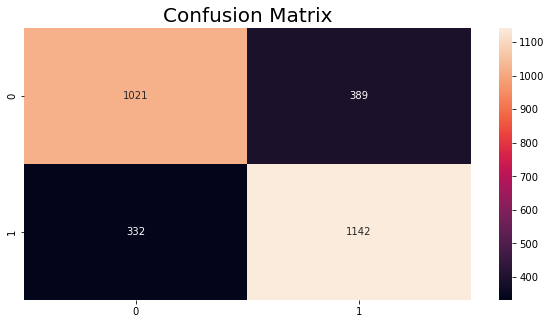

In [161]:
bst = XGBClassifier(n_estimators=6, max_depth=6, learning_rate=1, objective='binary:logistic')
result2(data_MinMaxScaler, Y, 0.2, 42, bst)

<b> Explanation: </b>
<br>
- Top left (1031): These are the True Negatives, meaning the model correctly predicted 1031 instances where the coupon was not accepted.
- Top right (404): These are the False Positives, meaning the model incorrectly predicted 404 instances where the coupon was accepted, but in reality, it was not.
- Bottom left (364): These are the False Negatives, meaning the model incorrectly predicted 364 instances where the coupon was not accepted, but in reality, it was.
- Bottom right (1110): These are the True Positives, meaning the model correctly predicted 1110 instances where the coupon was accepted.

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67      1410
           1       0.68      0.62      0.65      1474

    accuracy                           0.66      2884
   macro avg       0.66      0.66      0.66      2884
weighted avg       0.66      0.66      0.66      2884

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6591539528432733
----------------------------------------------------------------------------------------------------

Confusion Matrix: 



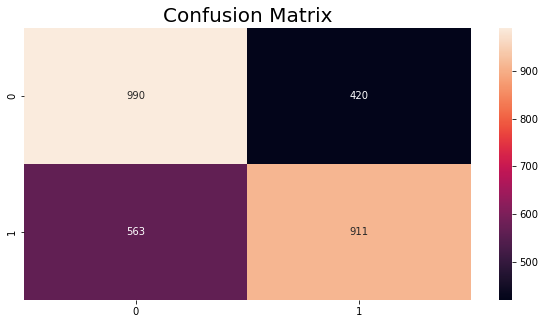

In [87]:
neigh = KNeighborsClassifier(n_neighbors=9) 
result2(data_pca, Y, 0.2, 42, neigh)

<b> Explanation: </b>
<br>
- Top left (1006): These are the True Negatives, meaning the model correctly predicted 1006 instances where the coupon was not accepted.
- Top right (404): These are the False Positives, meaning the model incorrectly predicted 404 instances where the coupon was accepted, but in reality, it was not.
- Bottom left (580): These are the False Negatives, meaning the model incorrectly predicted 580 instances where the coupon was not accepted, but in reality, it was.
- Bottom right (894): These are the True Positives, meaning the model correctly predicted 894 instances where the coupon was accepted.

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      1410
           1       0.70      0.68      0.69      1474

    accuracy                           0.69      2884
   macro avg       0.69      0.69      0.69      2884
weighted avg       0.69      0.69      0.69      2884

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6868932038834952
----------------------------------------------------------------------------------------------------

Confusion Matrix: 



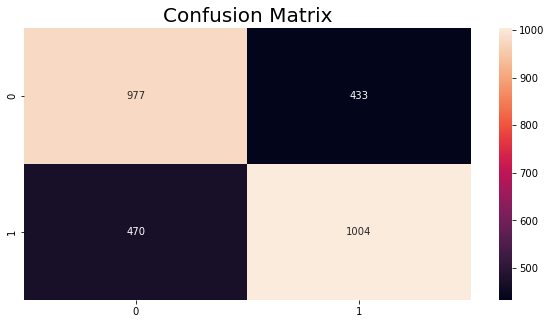

In [88]:
Dt = tree.DecisionTreeClassifier()
result2(Selected_features, Y, 0.2, 42, Dt)

<b> Explanation: </b>
<br>
- Top left (960): These are the True Negatives, meaning the model correctly predicted 960 instances where the coupon was not accepted.
- Top right (450): These are the False Positives, meaning the model incorrectly predicted 450 instances where the coupon was accepted, but in reality, it was not.
- Bottom left (472): These are the False Negatives, meaning the model incorrectly predicted 472 instances where the coupon was not accepted, but in reality, it was.
- Bottom right (1002): These are the True Positives, meaning the model correctly predicted 1002 instances where the coupon was accepted.